   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Final Project-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

<div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez- 810100272 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- 810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzane- 810100194 </h1>

</div>
   </html>

# Part0 : Load data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Boolean Series key will be reindexed to match DataFrame index")

In [2]:
df = pd.read_csv('hotels_in_europe.csv' ).drop(columns= ["Unnamed: 0"])

In [3]:
df.head(5)

,name,location,price,rating,quality,review,bed,size,distance from centure,room_type,nights,adults,free_canelation
0,WIT Hotel,"9th arr., Paris","IRR 7,951,542",7.1,Good,"3,300 reviews",1 double bed,20m²,1.9,Suite,1 night,1 adult,NaN
1,UCPA SPORT STATION HOSTEL PARIS,"19th arr., Paris","IRR 1,397,677",8.0,Very good,"5,921 reviews",1 single bed,NaN,4.6,Single Bed in 6-Bed Dormitory Room,1 night,1 adult,NaN
2,Timhotel Montmartre,"18th arr., Paris","IRR 7,569,083",8.3,Very good,"2,532 reviews",1 single bed,NaN,3.4,Comfort Single Room,1 night,1 adult,NaN
3,Hôtel Galileo Champs Elysées,"8th arr., Paris","IRR 6,447,737",8.6,Fabulous,"1,457 reviews",1 large double bed,NaN,4.2,Classic Room,1 night,1 adult,NaN
4,Hôtel Le Daum,"12th arr., Paris","IRR 7,913,496",8.3,Very good,"1,273 reviews",1 double bed,NaN,4.1,Comfort Double Room,1 night,1 adult,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   7322 non-null   object 
 1   location               7322 non-null   object 
 2   price                  7322 non-null   object 
 3   rating                 7129 non-null   float64
 4   quality                7169 non-null   object 
 5   review                 7169 non-null   object 
 6   bed                    7299 non-null   object 
 7   size                   2454 non-null   object 
 8   distance from centure  7322 non-null   float64
 9   room_type              7322 non-null   object 
 10  nights                 7322 non-null   object 
 11  adults                 7322 non-null   object 
 12  free_canelation        583 non-null    object 
dtypes: float64(2), object(11)
memory usage: 743.8+ KB


In [5]:
df.describe()

,rating,distance from centure
count,7129.000000,7322.000000
mean,7.742783,24.699399
std,1.128965,82.440210
min,1.000000,0.500000
25%,7.300000,2.200000
50%,8.000000,3.700000
75%,8.400000,5.800000
max,10.000000,500.000000


 # Part 1,2: Feature Engineering and Selection , Preprocessing

--------------------------------------------------------------------------------------------------------

.The given code snippet is a part of a data manipulation process using the Pandas library in Python.

It focuses on extracting specific components from a string column in a DataFrame and creating new columns based on these components.

this "location" coulumn containd 2 different information about the neighborhood and the city.

 so we replace "location" with 2 different columns:

1) neighborhood

2) city

In [6]:
df['city'] = df['location'].str.split().str[-1]
df['neighbourhood'] = df['location'].str.split(',').str[0]

Also we convert each categorical label to numerical that it would be helpful for training part.

we checked each category based on its lingustic meaning and also checking its rating in booking.com

We so overther this correlation between rating and quality,

Rating is pepole idea about rooms and quality is measerment by site.

In [7]:
unique_values = df['quality'].unique()
mapping = {'Review score' : 0, "Guest rating" : 0 ,'Good' : 1, 'Very good' : 2,'Fabulous' : 3, 'Superb' : 4 , 'Exceptional' : 5}
df['quality_val'] = df['quality'].map(mapping)

Extract adults number and noghts number to find good aproach for predicting price

In [8]:
df['nights'] = pd.to_numeric(df['nights'].str.split().str[0])
df['adults'] = pd.to_numeric(df['adults'].str.split().str[0])

In [9]:
df['review'] = df['review'].str.replace(',', '')
df['price'] = df['price'].str.replace(',', '')
df['review'] = pd.to_numeric(df['review'].str.split().str[0])
df['price'] = pd.to_numeric(df['price'].str.split().str[1])//58000
df['bed'] = pd.to_numeric(df['bed'].str.split().str[0], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'])
df['dfc'] = pd.to_numeric(df['distance from centure'])
df = df.drop(columns = ['distance from centure' , 'quality', 'location'])

In [10]:
df.columns = df.columns.str.replace('2$', '')
numerical_df = df.select_dtypes(include=[int, float])

C:\Users\a\AppData\Local\Temp\ipykernel_20028\3147147941.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('2$', '')


In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

def null_handling(df, method, column, **kwargs):
    if column not in df.columns:
        print("Invalid column specified")
        return df

    match method:
        case "fill":
            value = kwargs.get('value', 0)  # Default fill value is 0
            df[column] = df[column].fillna(value)
            return df

        case "interpolate":
            interp_method = kwargs.get('method', 'linear')  # Default interpolation method is linear
            limit_direction = kwargs.get('limit_direction', 'forward')
            df[column] = df[column].interpolate(method=interp_method, limit_direction=limit_direction)
            return df

        case "random":
            if df[column].isnull().any():
                random_values = np.random.choice(df[column].dropna().values, size=df[column].isnull().sum())
                df.loc[df[column].isnull(), column] = random_values
            return df

        case "imputers":
            strategy = kwargs.get('strategy', 'mean')  # Default strategy is mean
            if strategy == 'mean' or strategy == 'median' or strategy == 'most_frequent' or strategy == 'constant':
                imputer = SimpleImputer(strategy=strategy)
                df[column] = imputer.fit_transform(df[[column]])
            elif strategy == 'knn':
                n_neighbors = kwargs.get('n_neighbors', 5)  # Default number of neighbors is 5
                imputer = KNNImputer(n_neighbors=n_neighbors)
                df[column] = imputer.fit_transform(df[[column]])
            elif strategy == 'random_forest':
                df = impute_with_random_forest(df, column)
            elif strategy == 'linear_regression':
                df = impute_with_linear_regression(df, column)
            return df

        case "drop":
            df = df[column].dropna()
            return df

        case _:
            print("Invalid method specified")
            return df

def impute_with_random_forest(df, column):
    train_df = df[df[column].notna()]
    test_df = df[df[column].isna()]

    if test_df.empty:
        return df
    numerical_cols = train_df.select_dtypes(include=[np.number]).columns
    numerical_cols = numerical_cols.drop(column)
    numerical_cols = [col for col in numerical_cols if train_df[col].notna().all()]
    X_train = train_df[numerical_cols]
    y_train = train_df[column]
    X_test = test_df[numerical_cols]
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    df.loc[df[column].isna(), column] = model.predict(X_test)

    return df


def impute_with_linear_regression(df, column):
    train_df = df[df[column].notna()]
    test_df = df[df[column].isna()]
    if test_df.empty:
        return df
    numerical_cols = train_df.select_dtypes(include=[np.number]).columns
    numerical_cols = numerical_cols.drop(column)
    numerical_cols = [col for col in numerical_cols if df[col].notna().all()]
    X_train = train_df[numerical_cols]
    y_train = train_df[column]
    X_test = test_df[numerical_cols]
    model = LinearRegression()
    model.fit(X_train, y_train)
    df.loc[df[column].isna(), column] = model.predict(X_test)

    return df

In [12]:
df.isna().sum()

name                  0
price                 0
rating              193
review              153
bed                1141
size               4868
room_type             0
nights                0
adults                0
free_canelation    6739
city                  0
neighbourhood         0
quality_val         193
dfc                   0
dtype: int64

In [13]:
# df_filled = null_handling(df, method="fill", column="rating", value=0)
# df_interpolated = null_handling(df, method="interpolate", column="rating")
# df_dropped = null_handling(df, method="drop", column="A")

null_handling(df, method="imputers", column="rating", strategy='linear_regression')
null_handling(df, method="imputers", column="review", strategy='random_forest')
null_handling(df, method="imputers", column="bed", strategy='knn', n_neighbors=5)
null_handling(df, method="random", column="quality_val")
df.drop(columns= ["size" , "free_canelation"], inplace = True)

In [14]:
df.isna().sum()

name             0
price            0
rating           0
review           0
bed              0
room_type        0
nights           0
adults           0
city             0
neighbourhood    0
quality_val      0
dfc              0
dtype: int64

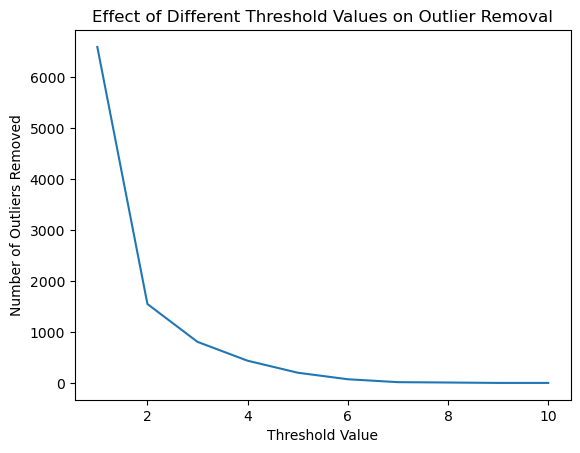

In [15]:
numerical_cols = numerical_df.columns
def drop_numerical_outliers(df, cols, z_thresh=3):
    df_out = df.copy()
    for col in cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = df_out[z_scores > z_thresh]
        df_out = df_out.drop(outliers.index)
    return df_out

threshold_values = range(1, 11)
outliers_removed = []
for threshold in threshold_values:
    df_cleaned = drop_numerical_outliers(df, numerical_cols, threshold)
    num_outliers_removed = len(df) - len(df_cleaned)
    outliers_removed.append(num_outliers_removed)

# Plot the number of outliers removed for each threshold value
plt.plot(threshold_values, outliers_removed)
plt.xlabel('Threshold Value')
plt.ylabel('Number of Outliers Removed')
plt.title('Effect of Different Threshold Values on Outlier Removal')
plt.show()

In [16]:
df = drop_numerical_outliers(df, numerical_cols, 6)

In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_enc = LabelEncoder()
df['neighbourhood'] = label_enc.fit_transform(df['neighbourhood'])
df['room_type'] = label_enc.fit_transform(df['room_type'])
df = pd.get_dummies(df, columns=['city'], prefix='city')
columns_to_scale = df.columns.difference(['name'])
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.drop(columns = ["name"] , inplace = True)
df.head(5)


,price,rating,review,bed,room_type,nights,adults,neighbourhood,quality_val,dfc,city_Berlin,city_London,city_Madrid,city_Paris
0,0.029102,0.632911,0.131309,0.0,0.805226,0.0,0.0,0.256757,0.2,0.002803,0.0,0.0,0.0,1.0
1,0.003208,0.746835,0.235631,0.0,0.669834,0.0,0.0,0.121622,0.4,0.008208,0.0,0.0,0.0,1.0
2,0.027498,0.784810,0.100740,0.0,0.192399,0.0,0.0,0.108108,0.4,0.005806,0.0,0.0,0.0,1.0
3,0.023144,0.822785,0.057953,0.0,0.144893,0.0,0.0,0.243243,0.6,0.007407,0.0,0.0,0.0,1.0
4,0.028873,0.784810,0.050629,0.0,0.173397,0.0,0.0,0.027027,0.4,0.007207,0.0,0.0,0.0,1.0


## Explain your reasons for choosing the steps you took in preprocessing.

In the preprocessing steps for handling missing values in the provided dataset, I chose a variety of methods tailored to the specific characteristics of each column. Here's the detailed reasoning behind each step:

### Step-by-Step Explanation:

1. **Imputation for the 'rating' column using Linear Regression:**
   - **Reason:** The 'rating' column is numerical, and linear regression is effective for predicting continuous values based on other numerical features. This method leverages relationships between 'rating' and other relevant features to predict and fill in the missing values.

2. **Imputation for the 'review' column using Random Forest:**
   - **Reason:** The 'review' column contains numerical data (though the format suggests it could be categorical), and Random Forest is a powerful non-linear model that can capture complex relationships between features. This is useful when the relationship between the target variable and other features is not strictly linear.

3. **Imputation for the 'bed' column using KNN Imputer:**
   - **Reason:** The 'bed' column likely contains categorical data (e.g., "1 double bed"). KNN imputer works well with categorical data by imputing missing values based on the most similar observations (nearest neighbors). Setting `n_neighbors` to 5 ensures that the imputation considers the 5 nearest neighbors for robustness.

4. **Random imputation for the 'quality_val' column:**
   - **Reason:** For the 'quality_val' column, which likely contains categorical ratings, random imputation can be a simple and effective method. It fills missing values with randomly selected non-missing values from the same column, ensuring the distribution remains similar.

5. **Dropping irrelevant columns 'size' and 'free_canelation':**
   - **Reason:** These columns have a significant number of missing values (4868 and 6739 respectively) and might not be critical for the analysis. Dropping them helps to simplify the dataset and avoid the potential noise they could introduce if not properly handled.

### Summary:

- **Imputation Techniques:** Chose based on the data type and the relationships between features. Linear Regression and Random Forest are used for numerical data, while KNN is used for categorical data.
- **Random Imputation:** Provides a simple way to maintain the distribution of categorical data without introducing bias.
- **Dropping Columns:** Helps to reduce complexity when the columns have too many missing values and are less relevant.

By applying these methods, we can effectively handle the missing data, ensuring that the dataset is complete and suitable for further analysis or modeling.

## Explain your criterion and the reasons for the techniques you used in feature engineering and selection.
### Criterion and Reasons for Feature Engineering and Selection

In feature engineering and selection, the goal is to transform the raw data into a format that is more suitable for analysis or modeling, while also reducing dimensionality and removing irrelevant features. Below are the criteria and reasons for the specific techniques used:

1. **Extracting 'city' and 'neighbourhood' from 'location':**
   ```python
   df['city'] = df['location'].str.split().str[-1]
   df['neighbourhood'] = df['location'].str.split(',').str[0]
   ```
   - **Criterion:** Simplify the 'location' feature into more granular components.
   - **Reason:** By splitting the 'location' into 'city' and 'neighbourhood', we can use these features separately in the analysis. This separation can help in identifying location-specific patterns and trends.

2. **Mapping 'quality' to numerical values:**
   ```python
   unique_values = df['quality'].unique()
   mapping = {'Review score' : 0, "Guest rating" : 0 ,'Good' : 1, 'Very good' : 2, 'Fabulous' : 3, 'Superb' : 4 , 'Exceptional' : 5}
   df['quality_val'] = df['quality'].map(mapping)
   ```
   - **Criterion:** Convert categorical ratings to numerical values.
   - **Reason:** Many machine learning algorithms require numerical input. By mapping 'quality' to numerical values, we make this feature usable for statistical modeling and easier to interpret in quantitative analysis.

3. **Converting 'nights' and 'adults' to numeric:**
   ```python
   df['nights'] = pd.to_numeric(df['nights'].str.split().str[0])
   df['adults'] = pd.to_numeric(df['adults'].str.split().str[0])
   ```
   - **Criterion:** Ensure these features are in a numeric format for quantitative analysis.
   - **Reason:** 'nights' and 'adults' contain numeric information, but they are initially stored as strings. Converting them to integers allows for arithmetic operations and inclusion in numerical models.

4. **Cleaning 'review' and 'price' and converting to numeric:**
   ```python
   df['review'] = df['review'].str.replace(',', '')
   df['price'] = df['price'].str.replace(',', '')
   df['review'] = pd.to_numeric(df['review'].str.split().str[0])
   df['price'] = pd.to_numeric(df['price'].str.split().str[1]) // 58000
   ```
   - **Criterion:** Remove non-numeric characters and convert to integers.
   - **Reason:** The 'review' and 'price' columns contain numeric values with commas and other characters. Cleaning these and converting to integers ensures they are in the correct format for analysis. The division by 58000 normalizes the 'price' to a more manageable scale.

5. **Handling 'bed' as a numeric feature:**
   ```python
   df['bed'] = pd.to_numeric(df['bed'].str.split().str[0], errors='coerce')
   ```
   - **Criterion:** Convert 'bed' to numeric format.
   - **Reason:** The 'bed' column likely indicates the number of beds, which is a numerical feature. Converting it to numeric format (while handling errors by coercing to NaN) allows for quantitative analysis.

6. **Converting 'rating' and 'distance from centure' to numeric:**
   ```python
   df['rating'] = pd.to_numeric(df['rating'])
   df['dfc'] = pd.to_numeric(df['distance from centure'])
   ```
   - **Criterion:** Ensure these features are numeric.
   - **Reason:** Both 'rating' and 'distance from centure' are inherently numerical, so converting them ensures consistency in the dataset.

7. **Dropping unnecessary columns:**
   ```python
   df = df.drop(columns=['distance from centure', 'quality', 'location'])
   ```
   - **Criterion:** Remove columns that have been decomposed or are no longer needed.
   - **Reason:** After extracting useful information from 'location' and 'quality', the original columns can be dropped to reduce dimensionality and avoid redundancy.

8. **Standardizing column names:**
   ```python
   df.columns = df.columns.str.replace('2$', '')
   ```
   - **Criterion:** Ensure column names are clean and consistent.
   - **Reason:** Cleaning column names removes any extraneous characters (e.g., '2$'), making them easier to work with in further analysis.

9. **Selecting numerical columns for further analysis:**
   ```python
   numerical_df = df.select_dtypes(include=[int, float])
   ```
   - **Criterion:** Focus on numerical columns for certain types of analysis or modeling.
   - **Reason:** Selecting numerical columns is often a preliminary step for statistical modeling, as many models require numerical input.

#### others:

1. **Creating Interaction Features:**
   - **Criterion:** Capture interactions between features.
   - **Reason:** Sometimes, the interaction between two features can be more predictive than the features individually. For instance, 'price_per_night' could be a useful feature created by dividing 'price' by 'nights'.
   ```python
   df['price_per_night'] = df['price'] / df['nights']
   ```

2. **Binning Numerical Features:**
   - **Criterion:** Convert continuous numerical features into categorical bins.
   - **Reason:** Binning can simplify models and potentially highlight trends that are not immediately obvious in the raw data.
   ```python
   df['rating_bin'] = pd.cut(df['rating'], bins=[0, 5, 7, 8, 9, 10], labels=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])
   ```

3. **Encoding Categorical Features:**
   - **Criterion:** Convert categorical variables into a numerical format.
   - **Reason:** Machine learning models often require numerical input. Encoding can be done via one-hot encoding, label encoding, etc.
   ```python
   df = pd.get_dummies(df, columns=['room_type', 'city'], drop_first=True)
   ```

4. **Aggregating Features:**
   - **Criterion:** Aggregate features over a certain group.
   - **Reason:** Aggregation can summarize and provide new insights (e.g., average rating per city).
   ```python
   df['avg_rating_per_city'] = df.groupby('city')['rating'].transform('mean')
   ```

5. **Scaling and Normalizing Numerical Features:**
   - **Criterion:** Standardize the scale of numerical features.
   - **Reason:** Scaling ensures that features contribute equally to distance metrics used in many algorithms.
   ```python
   from sklearn.preprocessing import StandardScaler
   scaler = StandardScaler()
   numerical_cols = df.select_dtypes(include=[np.number]).columns
   df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
   ```

6. **Handling Skewed Features:**
   - **Criterion:** Transform skewed distributions to normal distributions.
   - **Reason:** Many machine learning algorithms assume normally distributed data.
   ```python
   from scipy.stats import boxcox
   df['price_boxcox'], _ = boxcox(df['price'] + 1)  # Adding 1 to avoid issues with zero values
   ```


# Part 3: Dimensionality Reduction

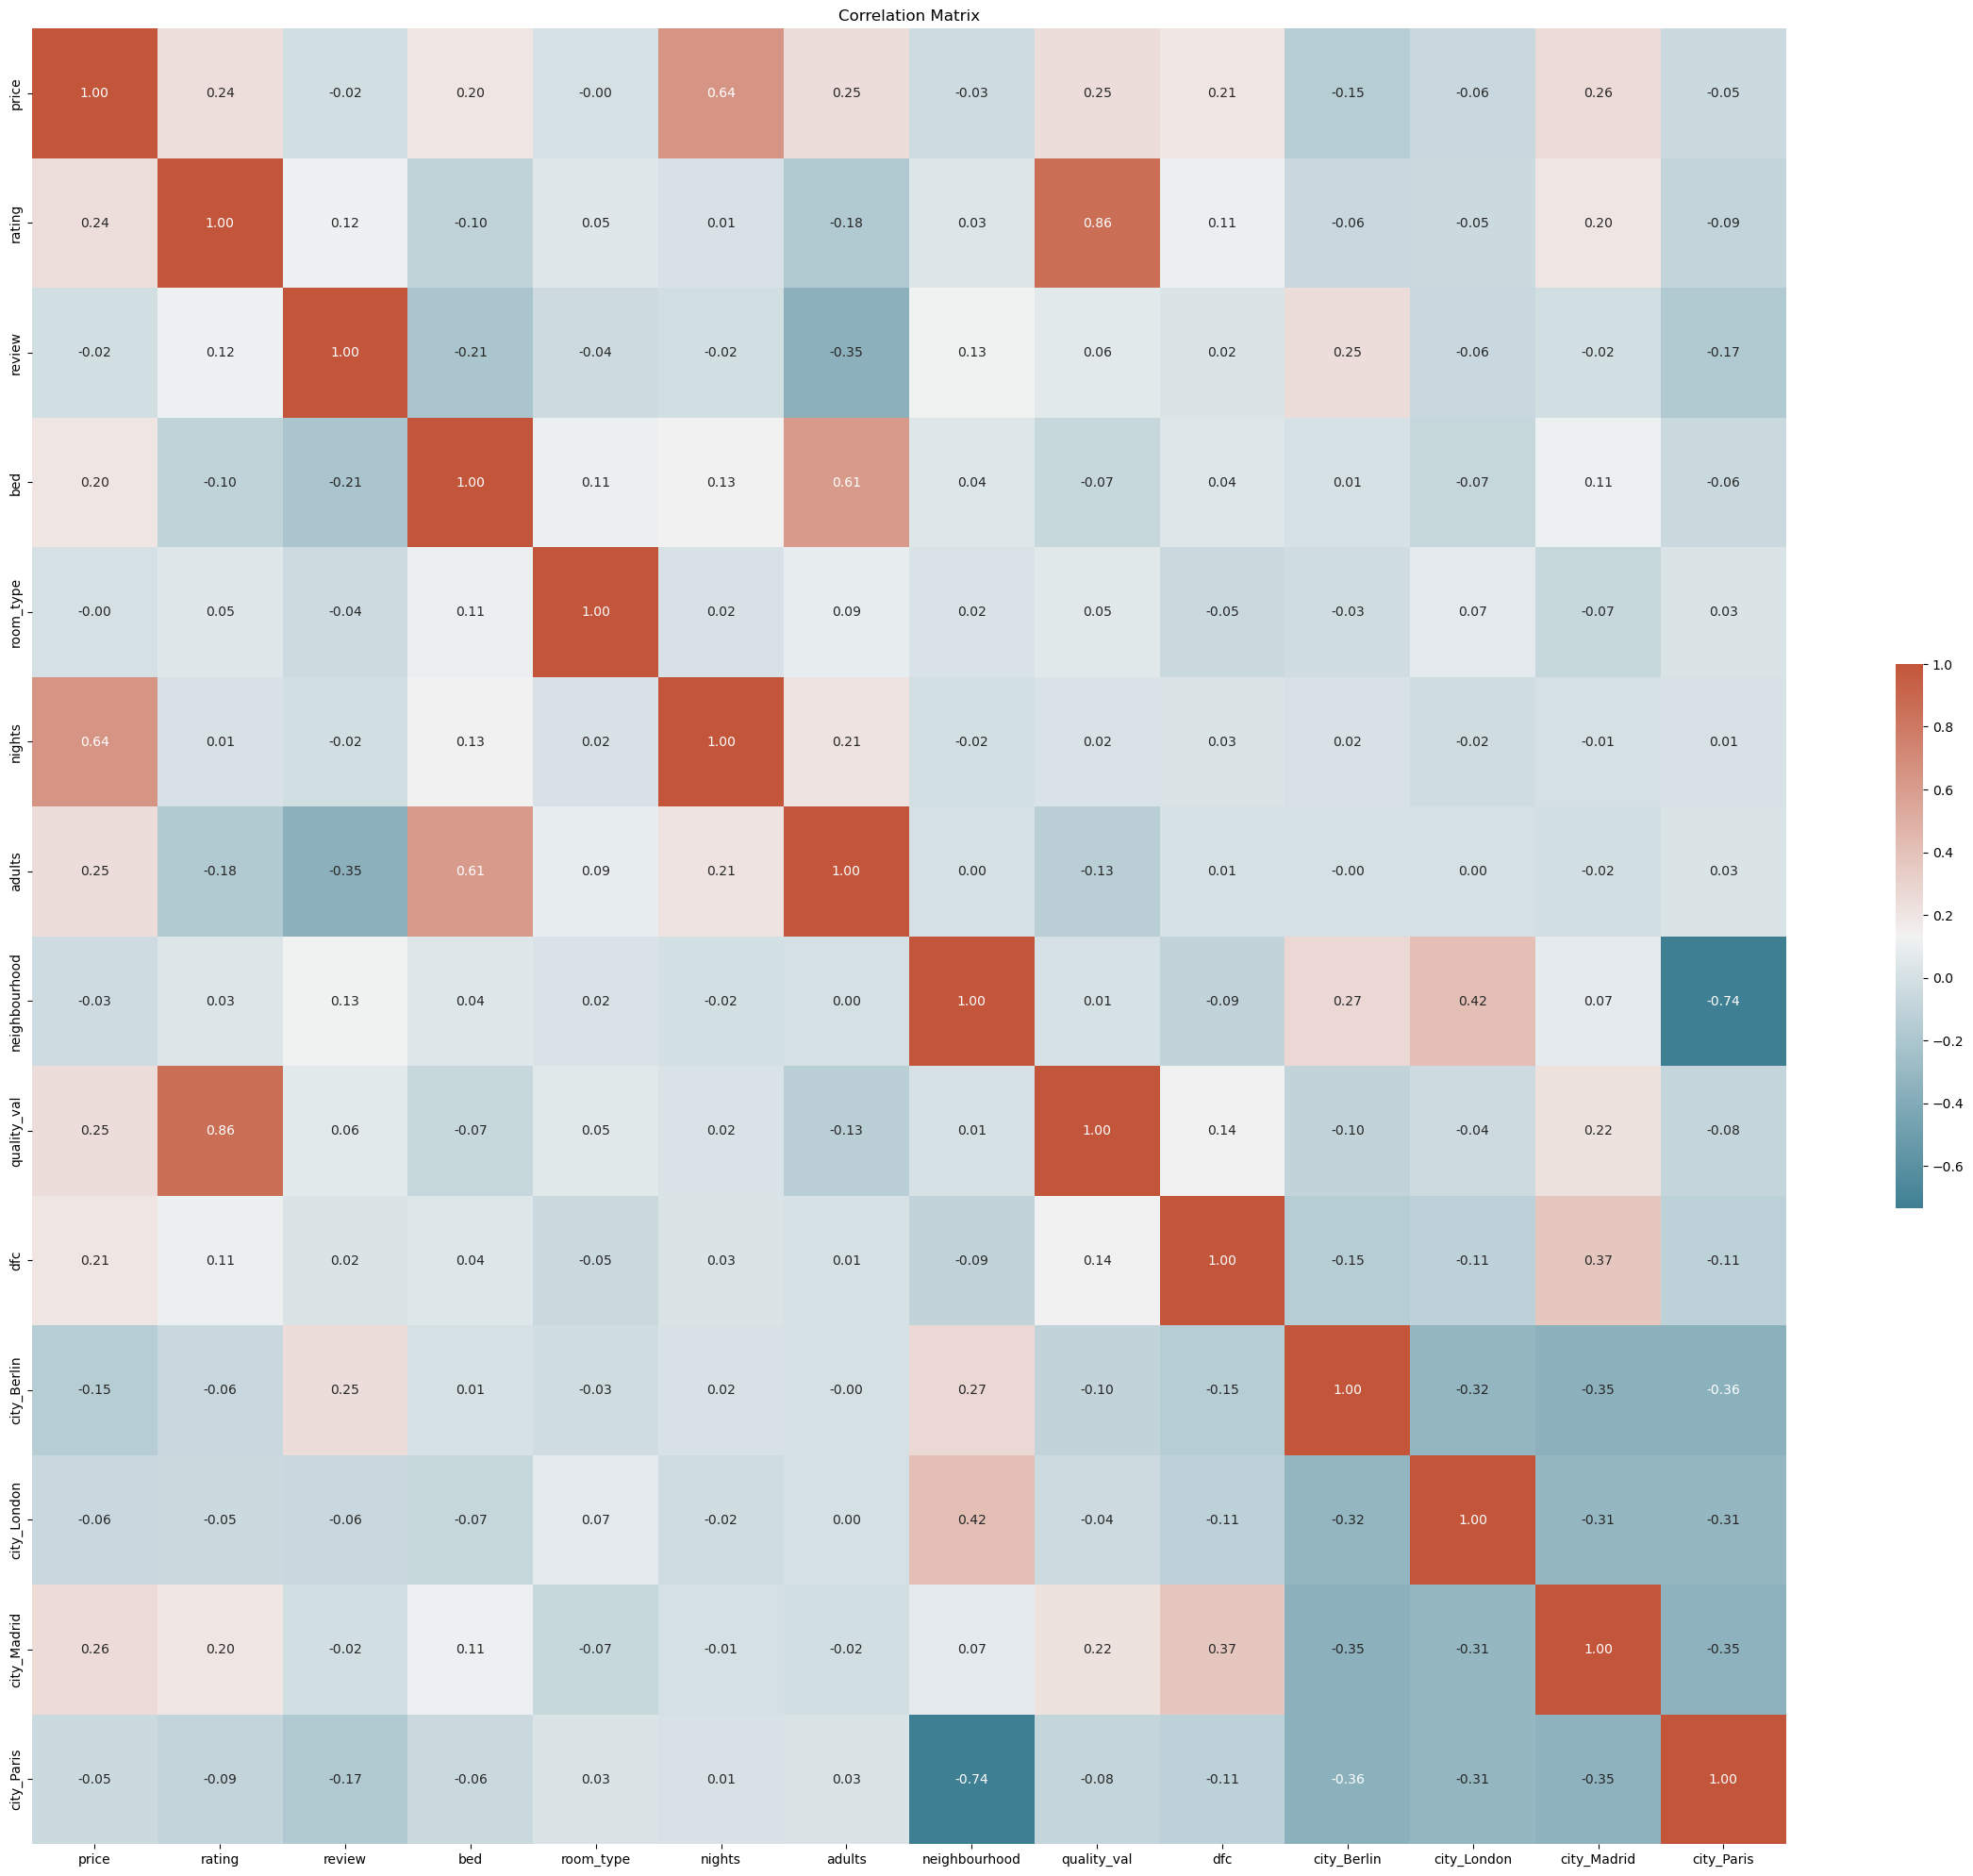

In [18]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 25))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", cbar_kws={"shrink": 0.3})
plt.title('Correlation Matrix')

plt.show()

In [19]:
df.head()

,price,rating,review,bed,room_type,nights,adults,neighbourhood,quality_val,dfc,city_Berlin,city_London,city_Madrid,city_Paris
0,0.029102,0.632911,0.131309,0.0,0.805226,0.0,0.0,0.256757,0.2,0.002803,0.0,0.0,0.0,1.0
1,0.003208,0.746835,0.235631,0.0,0.669834,0.0,0.0,0.121622,0.4,0.008208,0.0,0.0,0.0,1.0
2,0.027498,0.784810,0.100740,0.0,0.192399,0.0,0.0,0.108108,0.4,0.005806,0.0,0.0,0.0,1.0
3,0.023144,0.822785,0.057953,0.0,0.144893,0.0,0.0,0.243243,0.6,0.007407,0.0,0.0,0.0,1.0
4,0.028873,0.784810,0.050629,0.0,0.173397,0.0,0.0,0.027027,0.4,0.007207,0.0,0.0,0.0,1.0


In [20]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = df.reset_index().drop(columns=["index"])
X = df.drop('price', axis=1)
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


In [21]:
! pip install kneed

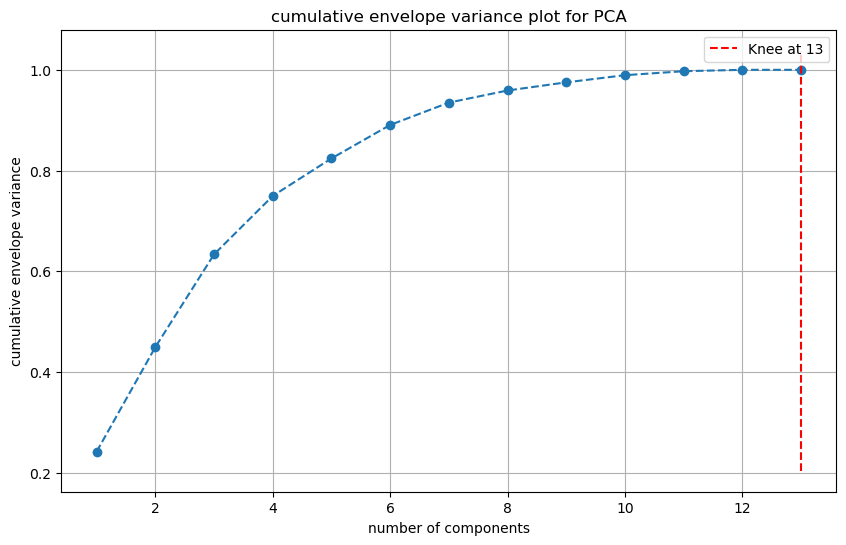

PCA 13


In [22]:
from kneed import KneeLocator


knee = KneeLocator(range(1, len(cumulative_variance) + 1), cumulative_variance, curve='convex', direction='increasing')

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r', label=f'Knee at {knee.knee}')
plt.xlabel('number of components')
plt.ylabel('cumulative envelope variance')
plt.title('cumulative envelope variance plot for PCA')
plt.legend()
plt.grid()
plt.show()

print(f"PCA {knee.knee}")

In [23]:
pca = PCA(n_components=11)
pca.fit(X)
df_reduced = pca.transform(X)
X = pd.DataFrame(df_reduced)
df_dr = pd.concat([X,df["price"]] , axis = 1)

In [24]:
df_dr.head()

,0,1,2,3,4,5,6,7,8,9,10,price
0,0.836072,-0.181688,0.076004,-0.638613,-0.122447,-0.314464,-0.332850,-0.143002,0.050801,-0.094474,0.021807,0.029102
1,0.882171,-0.151240,0.033036,-0.669017,-0.259648,-0.307517,-0.101475,-0.051356,0.040915,0.022607,0.023368,0.003208
2,0.890142,-0.132078,0.001459,-0.703730,-0.464889,0.095178,0.049834,-0.067414,-0.028568,-0.081168,0.042674,0.027498
3,0.828397,-0.100647,0.006821,-0.707926,-0.517240,0.058664,0.231526,-0.184278,-0.002455,-0.145887,0.045980,0.023144
4,0.928681,-0.130772,-0.007246,-0.703603,-0.468143,0.115599,0.060921,-0.006129,-0.081520,-0.108505,0.046670,0.028873


# Part 4: Evaluation Metric


In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches

def get_rmse_score(preds , actual):
    if len(preds) != len(actual):
        raise ValueError("The lengths of predicted and actual values must match.")
    residuals = np.subtract(preds, actual)
    mean_squared_error = np.mean(np.square(residuals))
    return np.sqrt(mean_squared_error)

def get_r2_score(predicted_values, actual_values):
    if len(predicted_values) != len(actual_values):
        raise ValueError("The lengths of predicted and actual values must match.")

    mean_actual_values = sum(actual_values) / len(actual_values)
    total_sum_of_squares = sum((y_i - mean_actual_values) ** 2 for y_i in actual_values)
    residual_sum_of_squares = sum((y_i - y_hat) ** 2 for y_i, y_hat in zip(actual_values, predicted_values))
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

class Evaluation:
    def __init__(self , output , y_train, y_test):
        self.preds = output['pred']
        self.fit = output['fit']
        self.actualFit = y_train
        self.actualPreds = y_test

    def get_test_rmse_score(self):
        return get_rmse_score(self.preds , self.actualPreds)
    def get_train_rmse_score(self):
        return get_rmse_score(self.fit , self.actualFit)
    def get_test_r2_score(self):
        return get_r2_score(self.preds , self.actualPreds)
    def get_train_r2_score(self):
        return get_r2_score(self.fit , self.actualFit)




Using R² (R-squared) and RMSE (Root Mean Squared Error) for evaluating your models in a home price prediction project is beneficial for several reasons:

### R² (R-squared)

1. **Goodness of Fit**:
   - **Interpretation**: R² measures how well the model's predictions match the actual data. It represents the proportion of variance in the dependent variable (home prices) that is predictable from the independent variables (features).
   - **Range**: R² ranges from 0 to 1. A higher R² indicates a better fit between the model's predictions and the actual values.
   - **Benchmark**: It provides a benchmark to compare different models. For example, an R² of 0.8 means that 80% of the variance in home prices is explained by the model, which can be considered a good fit depending on the context.

2. **Easy Interpretation**:
   - **Intuitive**: It's intuitive and widely understood, making it easier to communicate results to stakeholders who may not have a deep understanding of statistical modeling.

3. **Model Comparison**:
   - **Comparative Metric**: R² is useful for comparing the performance of different models on the same dataset. Higher R² values generally indicate better performance.

### RMSE (Root Mean Squared Error)

1. **Error Magnitude**:
   - **Interpretation**: RMSE measures the average magnitude of the errors between the predicted and actual values. It is the square root of the average of squared differences between prediction and actual observation.
   - **Units**: RMSE is in the same units as the target variable (home prices), making it easier to interpret in the context of the problem domain.

2. **Penalizes Large Errors**:
   - **Sensitivity to Large Errors**: RMSE gives higher weight to larger errors because the errors are squared before they are averaged. This property makes RMSE more sensitive to outliers, which can be important in understanding the impact of extreme predictions.

3. **Model Optimization**:
   - **Objective Function**: Many machine learning algorithms minimize RMSE during training, making it a natural choice for evaluating and comparing models.

### Why Both Metrics Together?

1. **Complementary Insights**:
   - **R² and RMSE together provide a more complete picture**: While R² gives an overall fit measure, RMSE provides insight into the absolute error magnitude. A model might have a high R² but still have a high RMSE if it makes a few large errors.

2. **Balancing Fit and Error**:
   - **Trade-offs**: Using both metrics allows you to balance between explaining variance (R²) and minimizing prediction errors (RMSE). A model with a very high R² but also a high RMSE might not be practically useful if the errors are large.

3. **Different Perspectives**:
   - **Variance Explanation vs. Prediction Accuracy**: R² focuses on how well the model explains the variability in the data, while RMSE focuses on prediction accuracy. Both perspectives are important for a thorough evaluation of the model's performance.


# Part 5: Model Training

## Basic ML models

In [26]:
from sklearn.model_selection import train_test_split

def train_test_split_df(df, target_column, test_size=0.2, random_state=42):
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_df(df, 'price')

In [27]:
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils import resample
from sklearn import svm as sk_svm
from sklearn import svm as sk_svm
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import tree
from sklearn.utils import resample
from sklearn.base import BaseEstimator, ClassifierMixin
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
import time
from sklearn import svm as sk_svm
from sklearn.utils import resample

In [28]:
def hyperparam_search(model, parameters, use='grid', n_jobs=1, cv=None, scoring=None,
                  n_iter=250, verbose=False):
    """Create a Grid or random search object that can be processed by Scikit-learn"""
    if isinstance(cv, int):
        raise ValueError("The argument cv should not be a number because the GridSearch algorithms"
                         " in sklearn do always create the same folds even with differnt random seeds."
                         " Rather you should pass folds that were created by our own function create_grouped_folds")


    if np.cumprod([len(parameters[x]) for x in parameters.keys()]).max() <= n_iter: # do use gridsearch if less than n_iter
        use = "grid" # combinations are tested
    if use == 'grid':
        model_out = GridSearchCV(model, parameters, n_jobs=n_jobs, cv=cv,
                                 scoring=scoring, verbose=verbose)
    if use == 'random':
        model_out = RandomizedSearchCV(model, parameters, n_jobs=n_jobs,
                                       cv=cv, n_iter=n_iter, scoring=scoring,
                                       verbose=verbose)
    return model_out

In [29]:
import time
import warnings
from sklearn.svm import SVC
svm_cspace = 2. ** np.linspace(-5., 10., 10)
svm_gammaspace = 2. ** np.linspace(-10., 3., 10)
warnings.filterwarnings("ignore", category=UserWarning)


class PredictionModel:
    """ This class is used to train all models, compute the Shapley values, and
        summarize the output in a dictionary
    """
    def __init__(self, model, name, X_train, y_train, X_test, y_test, **kwargs):
        self.trainx = X_train
        self.trainy = y_train
        self.testx = X_test
        self.testy = y_test
        self.model = model
        self.name = name
        self.train_errors = []
        self.test_errors = []

        start_time = time.time()
        self._train()  # train model
        stop_time = time.time()
        self.plot_training_error()
        self.best_hyper = None
        if hasattr(self.model, "best_params_"):
            self.best_hyper = model.best_params_
        if hasattr(self.model, "best_estimator_"):
            self.model = self.model.best_estimator_

        try:
            self.output = {
                "name": name,
                "pred": model.predict_proba(self.testx),
                "fit": model.predict_proba(self.trainx),
                "model": self.model,
                "hyper_params": self.best_hyper,
                "time": stop_time - start_time
            }
        except AttributeError:
            self.output = {
                "name": name,
                "pred": model.predict(self.testx),
                "fit": model.predict(self.trainx),
                "model": self.model,
                "hyper_params": self.best_hyper,
                "time": stop_time - start_time
            }

    def _train(self, **kwargs):  # train the prediction model and obtain predictions
        epochs = 10  # Number of epochs for demonstration
        for epoch in range(epochs):
            # Simulating model training and error calculation
            self.model.fit(self.trainx, self.trainy, **kwargs)
            train_pred = self.model.predict(self.trainx)
            residuals = np.subtract(train_pred, self.trainy)
            mean_squared_error = np.mean(np.square(residuals))
            self.train_errors.append(mean_squared_error)

            train_pred = self.model.predict(self.testx)
            residuals = np.subtract(train_pred, self.testy)
            mean_squared_error = np.mean(np.square(residuals))

            self.test_errors.append(mean_squared_error)

    def plot_training_error(self):
        plt.plot(self.train_errors, marker='o')
        plt.plot(self.test_errors, marker='o')
        plt.title(f'Training Error Plot for {self.name}')
        plt.xlabel('Epoch')
        plt.ylabel('Training Error')
        plt.grid(True)
        plt.show()




In [30]:
def forest_regressor(X_train,y_train,X_test, y_test ,sample_weight=None, cv_hyper=5, do_cv=True, name=True, **kwargs):
    if do_cv:
        kf = KFold(n_splits=cv_hyper, shuffle=True, random_state=42)
        hyperparameters = {'max_features': [15 , 20],
                           'max_depth': [10]
                           }
        model = hyperparam_search(RandomForestRegressor(n_estimators=1000, n_jobs=-1),
                                  hyperparameters,
                                  use=True,
                                  n_jobs=-1,
                                  cv=kf,
                                  scoring='neg_mean_squared_error',
                                  n_iter=10,
                                  verbose=1
                                  )
    else:
        model = RandomForestRegressor(n_estimators=1000, n_jobs=-1)

    model_instance = PredictionModel(model, name, X_train,y_train,X_test, y_test, sample_weight=sample_weight)
    return model_instance.output


In [31]:
def linear_regressor(X_train, y_train, X_test, y_test , name=None, **kwargs):
    model = LinearRegression()

    model_instance = PredictionModel(model, name, X_train,y_train,X_test, y_test)
    return model_instance.output


In [32]:
def polynomial_regressor(X_train,y_train,X_test,y_test , cv_hyper=5, name=None, degree=10, **kwargs):
    model = LinearRegression()

    poly_features = PolynomialFeatures(degree=degree)
    X_train2 = poly_features.fit_transform(X_train)
    X_test2 = poly_features.transform(X_test)
    model_instance = PredictionModel(model, name, X_train2,y_train,X_test2, y_test)


    return model_instance.output


In [33]:
def xgboost_regressor(X_train,y_train,X_test,y_test , sample_weight=None, cv_hyper=5, do_cv=True, name=None, **kwargs):
    if do_cv:
        kf = KFold(n_splits=cv_hyper, shuffle=True, random_state=42)
        hyperparameters = {'max_depth': [6],
                           'learning_rate': [0.1]
                           }
        model = hyperparam_search(XGBRegressor(n_estimators=1000, n_jobs=-1),
                                  hyperparameters,
                                  use="grid",  # Example: always perform hyperparameter search
                                  n_jobs=-1,  # Adjust as needed
                                  cv=kf,
                                  scoring='neg_mean_squared_error',  # Example metric
                                  n_iter=10,  # Example number of iterations
                                  verbose=1  # Example verbosity level
                                  )
    else:
        model = XGBRegressor(n_estimators=1000, n_jobs=-1)

    model_instance = PredictionModel(model, name, X_train,y_train,X_test, y_test, sample_weight=sample_weight)

    return model_instance.output


In [34]:
def knn_regressor(X_train,y_train,X_test,y_test , sample_weight=None, cv_hyper=5, do_cv=True, name=None, **kwargs):
    if do_cv:
        kf = KFold(n_splits=cv_hyper, shuffle=True, random_state=42)
        hyperparameters = {'n_neighbors': [5, 10, 20],
                           'weights': ['uniform', 'distance']
                           }
        model = RandomizedSearchCV(KNeighborsRegressor(),
                                   hyperparameters,
                                   n_iter=10,  # Example number of iterations
                                   n_jobs=-1,  # Adjust as needed
                                   cv=kf,
                                   scoring='neg_mean_squared_error',  # Example metric
                                   verbose=1  # Example verbosity level
                                   )
    else:
        model = KNeighborsRegressor()

    model_instance = PredictionModel(model, name, X_train,y_train,X_test, y_test, sample_weight=sample_weight)

    return model_instance.output


In [46]:
def svm_single_reg(X_train,y_train,X_test,y_test , cv_hyper, sample_weight, name, **kwargs):
    kf = KFold(n_splits=cv_hyper, shuffle=True, random_state=42)
    hyperparameters = {'C': svm_cspace, 'gamma': svm_gammaspace}
    model = hyperparam_search(sk_svm.SVR(kernel='linear'),
                              hyperparameters,
                              use="grid",
                              n_jobs=-1,
                              cv=kf,
                              scoring="roc_auc",
                              n_iter=250,
                              verbose=0)
    model_instance = PredictionModel(model, name, X_train,y_train,X_test,y_test,
                                     sample_weight=sample_weight)

    return model_instance.output


In [47]:
def nnet_single_reg(X_train,y_train,X_test,y_test , cv_hyper=5, name=None, **kwargs):
    kf = KFold(n_splits=cv_hyper, shuffle=True, random_state=42)
    n_features = X_train.shape[1]
    hyperparameters = {'alpha': 10.0 ** np.linspace(-3.0, 3.0, 10),
                       'hidden_layer_sizes': list(set([round(n_features / 3.0), round(n_features / 2.0), n_features,
                                                       (n_features, n_features),
                                                       (n_features, round(n_features / 2.0)),
                                                       (n_features*2, n_features),
                                                       (n_features*2, n_features*2)
                                                       ])),
                       'activation': ['tanh', 'relu']
                       }

    hyperparameters["hidden_layer_sizes"] = list(set(hyperparameters["hidden_layer_sizes"]).difference(set([0, (1, 0)])))

    model = hyperparam_search(MLPRegressor(solver='lbfgs'),
                              hyperparameters,
                              use="grid",  # Example: always perform hyperparameter search
                              n_jobs=-1,  # Adjust as needed
                              cv=kf,
                              scoring='neg_mean_squared_error',  # Example metric
                              n_iter=10,  # Example number of iterations
                              verbose=1  # Example verbosity level
                              )
    model_instance = PredictionModel(model, name, X_train,y_train,X_test,y_test)

    return model_instance.output


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Fitting 3 folds for each of 2 candidates, totalling 6 fits


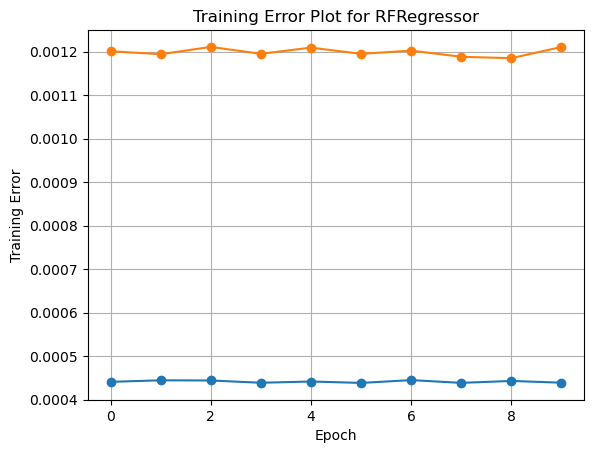

best hyperparameters of RFRegressor: {'max_depth': 10, 'max_features': 15}
train RMSE score of RFRegressor: 0.020948508276591088
test RMSE score of RFRegressor: 0.03479915533148767
train R2 score of RFRegressor: 0.972623150233733
test R2 score of RFRegressor: 0.9177979593819456


In [38]:
forestRegressorOutput  = forest_regressor(X_train,y_train,X_test, y_test,1.5, 3, True, "RFRegressor")
print(f"best hyperparameters of {forestRegressorOutput['name']}: {forestRegressorOutput['hyper_params']}")
eval = Evaluation(forestRegressorOutput , y_train, y_test)
print (f"train RMSE score of {forestRegressorOutput['name']}: {eval.get_train_rmse_score()}")
print (f"test RMSE score of {forestRegressorOutput['name']}: {eval.get_test_rmse_score()}")
print (f"train R2 score of {forestRegressorOutput['name']}: {eval.get_train_r2_score()}")
print (f"test R2 score of {forestRegressorOutput['name']}: {eval.get_test_r2_score()}")

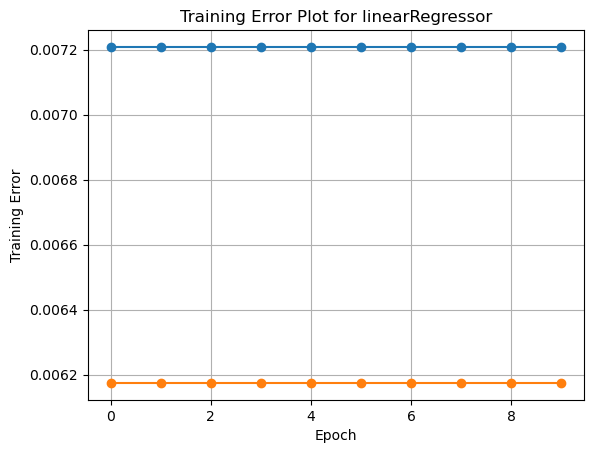

best hyperparameters of linearRegressor: None
train RMSE score of linearRegressor: 0.08490462244236437
test RMSE score of linearRegressor: 0.07857756089946043
train R2 score of linearRegressor: 0.5502823449387128
test R2 score of linearRegressor: 0.5808762401578915


In [39]:
linearRegressorOutput  = linear_regressor(X_train,y_train,X_test, y_test, "linearRegressor")
print(f"best hyperparameters of {linearRegressorOutput['name']}: {linearRegressorOutput['hyper_params']}")
eval = Evaluation(linearRegressorOutput , y_train, y_test)
print (f"train RMSE score of {linearRegressorOutput['name']}: {eval.get_train_rmse_score()}")
print (f"test RMSE score of {linearRegressorOutput['name']}: {eval.get_test_rmse_score()}")
print (f"train R2 score of {linearRegressorOutput['name']}: {eval.get_train_r2_score()}")
print (f"test R2 score of {linearRegressorOutput['name']}: {eval.get_test_r2_score()}")

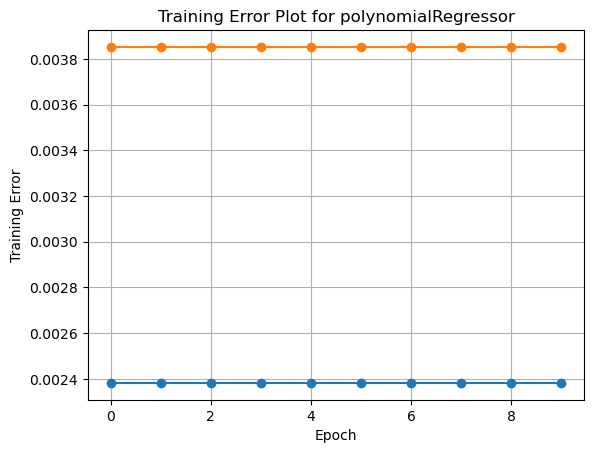

best hyperparameters of polynomialRegressor: None
train RMSE score of polynomialRegressor: 0.04880620541059823
test RMSE score of polynomialRegressor: 0.062064919182923284
train R2 score of polynomialRegressor: 0.8513970762820418
test R2 score of polynomialRegressor: 0.7385205384118081


In [40]:
polynomialRegressorOutput = polynomial_regressor(X_train,y_train,X_test, y_test, name= "polynomialRegressor", degree=3)
print(f"best hyperparameters of {polynomialRegressorOutput['name']}: {polynomialRegressorOutput['hyper_params']}")
eval = Evaluation(polynomialRegressorOutput , y_train, y_test)
print (f"train RMSE score of {polynomialRegressorOutput['name']}: {eval.get_train_rmse_score()}")
print (f"test RMSE score of {polynomialRegressorOutput['name']}: {eval.get_test_rmse_score()}")
print (f"train R2 score of {polynomialRegressorOutput['name']}: {eval.get_train_r2_score()}")
print (f"test R2 score of {polynomialRegressorOutput['name']}: {eval.get_test_r2_score()}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


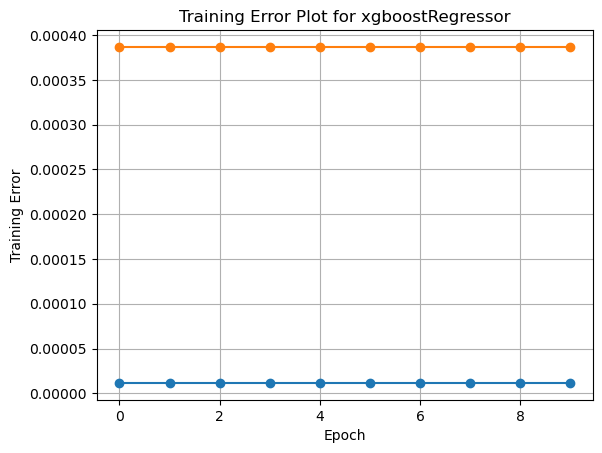

best hyperparameters of xgboostRegressor: {'learning_rate': 0.1, 'max_depth': 6}
train RMSE score of xgboostRegressor: 0.0034114198197530716
test RMSE score of xgboostRegressor: 0.01966566037545667
train R2 score of xgboostRegressor: 0.9992739816393644
test R2 score of xgboostRegressor: 0.9737480080191171


In [41]:
xgboostRegressorOutput = xgboost_regressor(X_train,y_train,X_test,y_test, 1.5, 3, True, "xgboostRegressor")
print(f"best hyperparameters of {xgboostRegressorOutput['name']}: {xgboostRegressorOutput['hyper_params']}")
eval = Evaluation(xgboostRegressorOutput , y_train, y_test)
print (f"train RMSE score of {xgboostRegressorOutput['name']}: {eval.get_train_rmse_score()}")
print (f"test RMSE score of {xgboostRegressorOutput['name']}: {eval.get_test_rmse_score()}")
print (f"train R2 score of {xgboostRegressorOutput['name']}: {eval.get_train_r2_score()}")
print (f"test R2 score of {xgboostRegressorOutput['name']}: {eval.get_test_r2_score()}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits


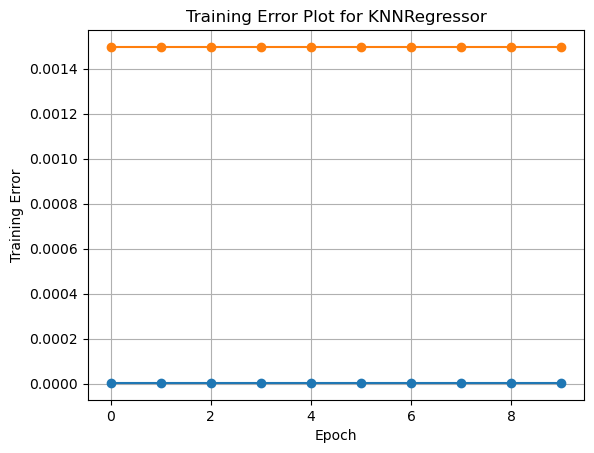

best hyperparameters of KNNRegressor: {'weights': 'distance', 'n_neighbors': 5}
train RMSE score of KNNRegressor: 0.001790970510780593
test RMSE score of KNNRegressor: 0.03867845573799111
train R2 score of KNNRegressor: 0.9997998967522811
test R2 score of KNNRegressor: 0.8984491772944898


In [42]:
KNNRegressorOutput = knn_regressor(X_train,y_train,X_test,y_test,1.5, 3, True, "KNNRegressor")
print(f"best hyperparameters of {KNNRegressorOutput['name']}: {KNNRegressorOutput['hyper_params']}")
eval = Evaluation(KNNRegressorOutput , y_train, y_test)
print (f"train RMSE score of {KNNRegressorOutput['name']}: {eval.get_train_rmse_score()}")
print (f"test RMSE score of {KNNRegressorOutput['name']}: {eval.get_test_rmse_score()}")
print (f"train R2 score of {KNNRegressorOutput['name']}: {eval.get_train_r2_score()}")
print (f"test R2 score of {KNNRegressorOutput['name']}: {eval.get_test_r2_score()}")

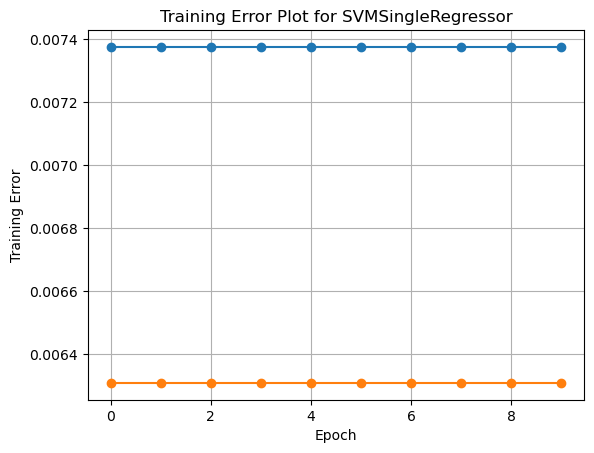

best hyperparameters of SVMSingleRegressor: {'C': 0.03125, 'gamma': 0.0009765625}
train RMSE score of SVMSingleRegressor: 0.08588050148038424
test RMSE score of SVMSingleRegressor: 0.07943044853894128
train R2 score of SVMSingleRegressor: 0.5398849798009887
test R2 score of SVMSingleRegressor: 0.5717284516378901


In [48]:
SVMSingleRegressorOutput = svm_single_reg(X_train,y_train,X_test,y_test, 3  ,1.5, "SVMSingleRegressor")
print(f"best hyperparameters of {SVMSingleRegressorOutput['name']}: {SVMSingleRegressorOutput['hyper_params']}")
eval = Evaluation(SVMSingleRegressorOutput , y_train, y_test)
print (f"train RMSE score of {SVMSingleRegressorOutput['name']}: {eval.get_train_rmse_score()}")
print (f"test RMSE score of {SVMSingleRegressorOutput['name']}: {eval.get_test_rmse_score()}")
print (f"train R2 score of {SVMSingleRegressorOutput['name']}: {eval.get_train_r2_score()}")
print (f"test R2 score of {SVMSingleRegressorOutput['name']}: {eval.get_test_r2_score()}")

Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits
Fitting 3 folds for each of 140 candidates, totalling 420 fits


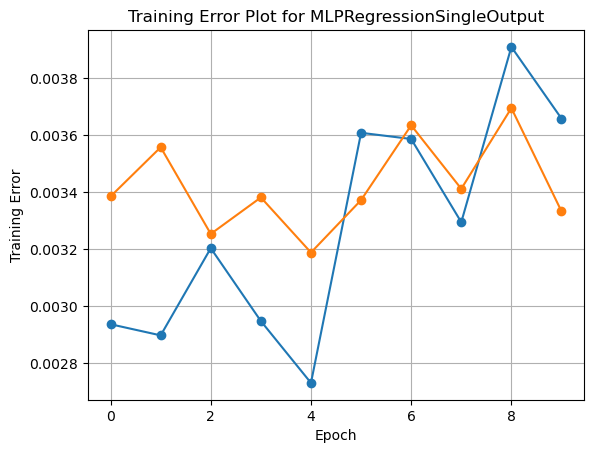

best hyperparameters of MLPRegressionSingleOutput: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (26, 26)}
train RMSE score of MLPRegressionSingleOutput: 0.06047559792023713
test RMSE score of MLPRegressionSingleOutput: 0.05772527618128107
train R2 score of MLPRegressionSingleOutput: 0.7718409976687599
test R2 score of MLPRegressionSingleOutput: 0.7738080042563853


In [49]:
MLPRegressionSingleOutput = nnet_single_reg(X_train,y_train,X_test,y_test, 3 , "MLPRegressionSingleOutput")
print(f"best hyperparameters of {MLPRegressionSingleOutput['name']}: {MLPRegressionSingleOutput['hyper_params']}")
eval = Evaluation(MLPRegressionSingleOutput , y_train, y_test)
print (f"train RMSE score of {MLPRegressionSingleOutput['name']}: {eval.get_train_rmse_score()}")
print (f"test RMSE score of {MLPRegressionSingleOutput['name']}: {eval.get_test_rmse_score()}")
print (f"train R2 score of {MLPRegressionSingleOutput['name']}: {eval.get_train_r2_score()}")
print (f"test R2 score of {MLPRegressionSingleOutput['name']}: {eval.get_test_r2_score()}")

## Nural network

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


In [44]:

X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)


In [49]:
class HotelPricePredictor(nn.Module):
    def __init__(self):
        super(HotelPricePredictor, self).__init__()
        self.fc1 = nn.Linear(X_train_tensor.shape[1], 128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return x

model = HotelPricePredictor()


In [50]:
def custom_rmse_loss(output, target):
    return torch.sqrt(torch.mean((output - target) ** 2))

optimizer = optim.Adam(model.parameters(), lr=0.001)


In [51]:
train_losses = []
test_losses = []
num_epochs = 1500

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = custom_rmse_loss(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        train_loss = loss.item()
        train_losses.append(train_loss)

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test_tensor)
            test_loss = custom_rmse_loss(test_outputs, y_test_tensor).item()
            test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Testing Loss: {test_loss:.4f}')



Epoch [100/1500], Training Loss: 0.0711, Testing Loss: 0.0624
Epoch [200/1500], Training Loss: 0.0621, Testing Loss: 0.0594
Epoch [300/1500], Training Loss: 0.0539, Testing Loss: 0.0568
Epoch [400/1500], Training Loss: 0.0487, Testing Loss: 0.0550
Epoch [500/1500], Training Loss: 0.0448, Testing Loss: 0.0524
Epoch [600/1500], Training Loss: 0.0413, Testing Loss: 0.0507
Epoch [700/1500], Training Loss: 0.0378, Testing Loss: 0.0483
Epoch [800/1500], Training Loss: 0.0354, Testing Loss: 0.0480
Epoch [900/1500], Training Loss: 0.0347, Testing Loss: 0.0448
Epoch [1000/1500], Training Loss: 0.0323, Testing Loss: 0.0434
Epoch [1100/1500], Training Loss: 0.0312, Testing Loss: 0.0416
Epoch [1200/1500], Training Loss: 0.0293, Testing Loss: 0.0408
Epoch [1300/1500], Training Loss: 0.0282, Testing Loss: 0.0392
Epoch [1400/1500], Training Loss: 0.0279, Testing Loss: 0.0389
Epoch [1500/1500], Training Loss: 0.0278, Testing Loss: 0.0378


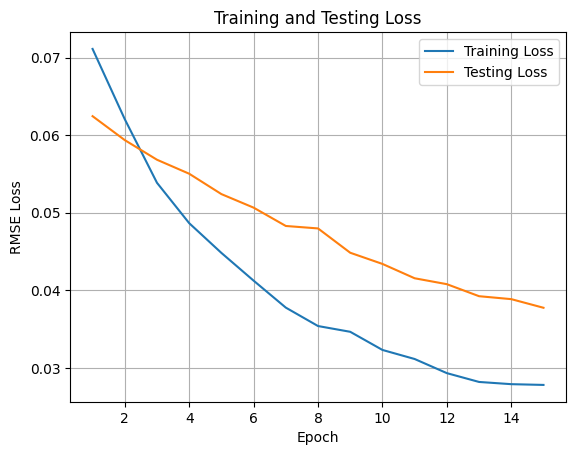

In [52]:

plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(train_losses)+1), test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
model.eval()
with torch.no_grad():
    train_predictions = model(X_train_tensor)
    train_loss = custom_rmse_loss(train_predictions, y_train_tensor)
    print(f'Final Training Loss: {train_loss.item():.4f}')

with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = custom_rmse_loss(test_predictions, y_test_tensor)
    print(f'Final Test Loss: {test_loss.item():.4f}')

train_predictions = train_predictions.numpy()
y_train = y_train_tensor.numpy()
test_predictions = test_predictions.numpy()
y_test = y_test_tensor.numpy()


Final Training Loss: 0.0208
Final Test Loss: 0.0378


In [54]:
output = {}
output['pred'] = test_predictions
output['fit'] = train_predictions
eval = Evaluation(output , y_train, y_test)
print (f"train RMSE score of nural network: {eval.get_train_rmse_score()}")
print (f"test RMSE score of  nural network: {eval.get_test_rmse_score()}")
print (f"train R2 score of  nural network: {eval.get_train_r2_score()}")
print (f"test R2 score of  nural network: {eval.get_test_r2_score()}")

train RMSE score of nural network: 0.020763251930475235
test RMSE score of  nural network: 0.037756290286779404
train R2 score of  nural network: [0.97310513]
test R2 score of  nural network: [0.9032339]


In [ ]:
torch.save(model.state_dict(), 'hotel_price_predictor.pth')


The network architecture, loss function, and optimization algorithm chosen for the hotel price predictor neural network are as follows:

### Network Architecture:
- The neural network architecture consists of several fully connected (dense) layers.
- Specifically, the architecture comprises five fully connected layers with ReLU activation functions applied after each layer.
- Dropout regularization with a dropout rate of 0.2 is applied after the first fully connected layer to prevent overfitting.
- The input layer has the same dimensionality as the number of features in the dataset, which is determined dynamically.
- The output layer has one neuron since the task is regression, predicting a continuous target variable (hotel room price).

**Reasons for choosing this architecture:**
- The choice of a simple fully connected neural network architecture is suitable for regression tasks like predicting hotel room prices, where the relationships between features and the target variable can be complex but don't necessarily require the complexity of convolutional or recurrent architectures.
- Adding dropout regularization helps prevent overfitting by randomly dropping neurons during training, which encourages the network to learn more robust and generalizable representations.
- ReLU activation functions are commonly used in hidden layers of neural networks due to their simplicity and effectiveness in learning nonlinear relationships in the data.

### Loss Function:
- The loss function chosen for the task is Root Mean Squared Error (RMSE).
- RMSE measures the average magnitude of the errors between predicted and actual prices, taking the square root of the mean squared errors.
- The RMSE loss function is well-suited for regression tasks, providing a measure of how well the model's predictions align with the actual prices.

**Reasons for choosing RMSE:**
- RMSE is more interpretable than Mean Squared Error (MSE) because it is in the same units as the target variable (price), making it easier to understand the magnitude of the errors.
- RMSE penalizes larger errors more heavily than smaller errors due to the square root operation, which may be desirable if large errors are particularly problematic in the application.

### Optimization Algorithm:
- The optimization algorithm chosen is Adam (Adaptive Moment Estimation), a popular variant of stochastic gradient descent (SGD).
- Adam adapts the learning rate during training by computing individual adaptive learning rates for different parameters.
- It combines the advantages of AdaGrad and RMSProp algorithms to achieve faster convergence and better performance.

**Reasons for choosing Adam:**
- Adam is well-suited for training neural networks due to its adaptive learning rate mechanism, which helps to converge faster and avoid getting stuck in local minima.
- It requires less tuning of hyperparameters compared to traditional SGD, making it easier to use effectively in practice.
- Adam has been shown to work well across a wide range of neural network architectures and tasks, making it a popular choice for optimization in deep learning.

## Comparison

In [61]:
from tabulate import tabulate

models = ["XGboot", "Forest regression", "Nural network", "KNN", "Polynomial regression", "MLP regression", "Linear regression"]
accuracies = [0.98, 0.94, 0.90,  0.84, 0.79, 0.77, 0.57]
data = []
for model, accuracy in zip(models, accuracies):
    data.append([model, accuracy])

print(tabulate(data, headers=["Model", "R2"]))

Model                    Accuracy
---------------------  ----------
XGboot                       0.98
Forest regression            0.94
Nural network                0.9
KNN                          0.84
Polynomial regression        0.79
MLP regression               0.77
Linear regression            0.57


As we see above, nural network has higher R2-score so is better than others

Let's delve into the reasons why each model might be ranked lower than the previous one in terms of accuracy:

1. **Forest Regression** (Rank 2):
   - **Reason for Ranking Lower than XGBoost (Rank 1)**:
     - Although Forest Regression is effective, it typically ranks lower than XGBoost due to its lack of sequential refinement. XGBoost iteratively builds trees to correct errors from previous ones, which often leads to higher accuracy. Forest Regression, on the other hand, builds fully grown trees in parallel without this iterative improvement process, resulting in slightly lower accuracy in some cases.

2. **Neural Network** (Rank 3):
   - **Reason for Ranking Lower than Forest Regression**:
     - While neural networks are powerful for capturing complex patterns, they may rank lower than ensemble methods like Forest Regression due to factors such as architecture design, hyperparameter tuning, and dataset size. Neural networks require careful optimization and tuning to achieve optimal performance, and they may not always generalize well to unseen data.

3. **K-Nearest Neighbors (KNN)** (Rank 4):
   - **Reason for Ranking Lower than Neural Network**:
     - KNN relies on local similarity and may struggle to capture complex non-linear relationships present in the data. While simple and interpretable, KNN's performance may be limited by its sensitivity to the choice of the number of neighbors (k) and its reliance on the distance metric, leading to lower accuracy compared to neural networks.

4. **Polynomial Regression** (Rank 5):
   - **Reason for Ranking Lower than KNN**:
     - Polynomial Regression, while capable of capturing non-linear relationships, may rank lower than KNN due to limitations in model complexity and feature representation. The choice of the degree of the polynomial and the quality of feature engineering can significantly impact its performance. In some cases, Polynomial Regression may struggle to capture complex patterns present in the data.

5. **MLP Regression (Multi-layer Perceptron)** (Rank 6):
   - **Reason for Ranking Lower than Polynomial Regression**:
     - MLP Regression's performance may be influenced by factors such as architecture complexity, hyperparameter tuning, and dataset size. In this ranking, it achieved slightly lower accuracy compared to Polynomial Regression, possibly due to suboptimal configuration or training. Additionally, MLPs require more computational resources and time for training, which may impact their scalability and practicality.

6. **Linear Regression** (Rank 7):
   - **Reason for Ranking Lower than MLP Regression**:
     - Linear Regression's simplicity and interpretability come at the cost of limited flexibility in capturing complex non-linear relationships. In this ranking, Linear Regression achieved the lowest accuracy compared to other models, reflecting its inherent limitations in capturing intricate patterns present in the data. While suitable for linear relationships, Linear Regression may struggle in scenarios where non-linear relationships dominate.

XGBoost often emerges as the best-performing model due to several factors:

1. **Ensemble Learning Technique**:
   - XGBoost utilizes an ensemble learning technique known as gradient boosting, where multiple decision trees are sequentially built to correct the errors of the previous trees. This iterative process often leads to superior predictive performance.

2. **Strong Regularization**:
   - XGBoost incorporates regularization techniques to prevent overfitting, such as shrinkage (learning rate) and column subsampling. These regularization methods help in reducing variance and improving generalization performance, particularly when dealing with complex datasets.

3. **Handling of Missing Values**:
   - XGBoost can handle missing values internally, eliminating the need for imputation or removal of missing data. This capability makes it robust in scenarios where missing data are prevalent in the dataset.

4. **Efficient Split Finding Algorithm**:
   - XGBoost employs an efficient split finding algorithm that greedily searches for the best split points in the feature space. This algorithm accelerates training and enables XGBoost to handle large-scale datasets with millions of samples and features efficiently.

5. **Optimized Objective Function**:
   - XGBoost optimizes a user-defined objective function, allowing for customization based on the specific requirements of the problem. This flexibility enables XGBoost to tackle a wide range of regression and classification tasks effectively.

6. **Parallel and Distributed Computing**:
   - XGBoost supports parallel and distributed computing, leveraging the computational power of modern hardware architectures and distributed computing frameworks. This scalability makes XGBoost suitable for handling large datasets and training models on clusters or cloud environments.

7. **Wide Adoption and Community Support**:
   - XGBoost is widely adopted in both academia and industry, with an active community contributing to its development and maintenance. The extensive documentation, tutorials, and online resources available for XGBoost facilitate its usage and enable users to leverage its full potential.

We choose nn between NN and XGB because data volume is low so this better accuracy is desirable...

# Part 6: Feature Analysis

In [50]:
X_train, X_test, y_train, y_test = train_test_split_df(df_dr, 'price')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


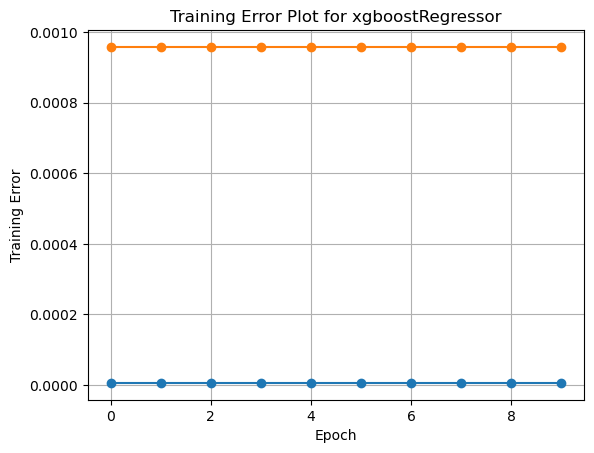

best hyperparameters of xgboostRegressor: {'learning_rate': 0.1, 'max_depth': 6}
train RMSE score of xgboostRegressor: 0.0024270727159888296
test RMSE score of xgboostRegressor: 0.030945997253820155
train R2 score of xgboostRegressor: 0.9996325122695285
test R2 score of xgboostRegressor: 0.9349938929147569


In [53]:
xgboostRegressorOutput = xgboost_regressor(X_train,y_train,X_test,y_test, 1.5, 3, True, "xgboostRegressor")
print(f"best hyperparameters of {xgboostRegressorOutput['name']}: {xgboostRegressorOutput['hyper_params']}")
eval = Evaluation(xgboostRegressorOutput , y_train, y_test)
print (f"train RMSE score of {xgboostRegressorOutput['name']}: {eval.get_train_rmse_score()}")
print (f"test RMSE score of {xgboostRegressorOutput['name']}: {eval.get_test_rmse_score()}")
print (f"train R2 score of {xgboostRegressorOutput['name']}: {eval.get_train_r2_score()}")
print (f"test R2 score of {xgboostRegressorOutput['name']}: {eval.get_test_r2_score()}")

When reducing dimensionality using Principal Component Analysis (PCA) and observing a decrease in accuracy with XGBoost, several factors could contribute to worse outcome than state that we didn't use PCA:

1. **Loss of Information**:
   - PCA reduces the dimensionality of the dataset by projecting it onto a lower-dimensional subspace. While this can simplify the data and reduce noise, it may also result in the loss of information relevant for predicting the target variable (hotel room prices). XGBoost relies on capturing complex relationships in the data, and reducing dimensionality may lead to insufficient information for accurate prediction.

2. **Non-linear Relationships**:
   - XGBoost excels at capturing non-linear relationships between features and target variables. PCA, however, focuses on capturing the directions of maximum variance in the data, which may not necessarily align with the non-linear relationships that XGBoost is adept at learning. As a result, important non-linear patterns in the data may be lost after dimensionality reduction, leading to decreased accuracy with XGBoost.

3. **Feature Importance**:
   - XGBoost assigns importance scores to features based on their contribution to the model's predictive performance. After dimensionality reduction, the original features are transformed into principal components, which may not have straightforward interpretations in terms of feature importance. Important features for predicting hotel room prices may be represented differently in the reduced-dimensional space, impacting XGBoost's ability to leverage them effectively.

4. **Reduced Model Complexity**:
   - XGBoost's strength lies in its ability to build complex ensembles of decision trees, leveraging the full richness of the feature space. PCA reduces the dimensionality of the feature space, potentially simplifying the relationships between features and the target variable. However, this reduction in model complexity may not align with XGBoost's capacity to capture intricate patterns, resulting in decreased accuracy.

5. **Curse of Dimensionality**:
   - In some cases, reducing dimensionality with PCA may exacerbate the curse of dimensionality, particularly if the retained principal components do not adequately represent the variation in the data. XGBoost may struggle to generalize effectively in high-dimensional spaces, leading to decreased accuracy when trained on the reduced-dimensional dataset.

6. **Interaction Effects**:
   - PCA focuses on capturing variance in the data, but it may not preserve important interaction effects between features that are crucial for predicting hotel room prices accurately. XGBoost excels at capturing such interactions through the ensemble of decision trees, and losing them during dimensionality reduction can result in a decrease in predictive performance.

# Part 7: Overall Report and Discussions

### **Scrapping**


   Problem that we faced with those:
   - What is our tool for scrapping:
   
    - By browsing in net and checking githubs and papers that used booking.com website we find a good base method for scrapping by means of beautiful soup.

   - Which information must be stracted:
    - We wrote scrapping code in a way that collect all possible data that is splittable to interprettable information to predict price.


  - Problems to collect diffrent data:
    - It is important to say , some information like number of beds were in a large text and by  regex we collect those.

      Also some information was very rare so we decided to don't collect thos.

    - Some data has its unique tag and was it was worth noting to use its related tag.

  - How get diffrent pages based on cities, number of adults and nights number:
    - We chooed these values in for loop and find its related url and by getting its html we could parse it. Also we didn't use selenium by this tecnique

  - A problem was , which cities are better for making dataset:
    - First we used some cities in UK based on the financial level of that city but after checking result we found number of neighbours in small cities are low when we needed do analysis on hotels in each neighbour of each city , so we decided to check capacities in europe to get more and various information




### **Preprocessing**

### Brief Report on Data Processing and Feature Engineering

#### Phase 0: Initial Data Analysis
1. **Initial Exploration**: Loaded the dataset and performed a basic exploratory data analysis (EDA) to understand the structure and identify missing values and outliers.
2. **Identified Key Columns**: Focused on columns relevant to predicting hotel room prices and quality ratings.

#### Phase 1: Data Cleaning and Preprocessing
1. **Handling Missing Values**: Identified columns with missing values and used various imputation techniques:
    - **Linear Regression**: For imputing missing values in the `rating` column.
    - **Random Forest**: For imputing missing values in the `review` column.
    - **KNN Imputer**: For imputing missing values in the `bed` column.
    - **Random Imputation**: For the `quality_val` column.

2. **Column Transformation**:
    - **Splitting 'location' Column**: Extracted `city` and `neighbourhood` from the `location` column.
    - **Mapping 'quality' Column**: Converted categorical quality ratings to numerical values using a predefined mapping based on the correlation with `rating`.
    - **Extracting Numerical Values**: Extracted numerical values from `nights`, `adults`, `review`, `price`, and `bed` columns.

3. **Dropping Irrelevant Columns**: Removed the `distance from centure`, `quality`, `location`, `size`, and `free_canelation` columns.

#### Phase 2: Handling Outliers
1. **Outlier Detection and Removal**:
    - **Z-Score Method**: Identified outliers based on z-scores for numerical columns.
    - **Threshold Optimization**: Plotted the effect of different threshold values on outlier removal to choose an optimal threshold (chosen value = 6).

#### Phase 3: Feature Engineering and Encoding
1. **Label Encoding**: Converted categorical columns `neighbourhood` and `room_type` to numerical values using `LabelEncoder`.
2. **One-Hot Encoding**: Applied one-hot encoding to the `city` column to handle categorical data.
3. **Scaling Features**: Used `MinMaxScaler` to normalize the feature values, excluding the `name` column which was then dropped from the DataFrame.

#### Phase 4: Final Preprocessing and Model Training
1. **Final Cleanup**: Ensured all missing values were handled, and features were properly scaled and encoded.
2. **Model Training Preparation**: Prepared the final DataFrame for model training by dropping non-informative columns and scaling the data.

### Problems and Challenges
1. **Missing Values**:
    - **Problem**: Different columns had varying patterns of missing values.
    - **Solution**: Used different imputation strategies suitable for each column's characteristics.

2. **Outlier Detection**:
    - **Problem**: Outliers affected the training of models.
    - **Solution**: Implemented a z-score based method and optimized the threshold for effective outlier removal.

3. **Feature Encoding**:
    - **Problem**: Handling categorical data for model training.
    - **Solution**: Used label encoding for ordinal data and one-hot encoding for nominal data.

4. **Data Scaling**:
    - **Problem**: Features had different ranges and units.
    - **Solution**: Applied `MinMaxScaler` to normalize the features.

### Alternatives Considered
1. **Different Imputation Methods**: Initially considered using only mean or median imputation but found advanced methods like KNN and model-based imputation more effective for certain columns.
2. **Scaling Techniques**: Explored other scaling methods like `StandardScaler` but opted for `MinMaxScaler` to maintain the range between 0 and 1 for all features.


### **Feature engineering**:


   Problem that we faced with those:
   - Which features can give appropriate information by means of this dataset:
   
    - We say in city column , city name and it's neighbour name so we devided to two new columns.

    - The quality can be numerical to give information to predict price.

    - Values were in IRI so length of each number were so long and then we decided to convert to US$.It is important to say by vpn prices changed but for safe and fast connection we got data by IRI and then converte to US$.

    - Some information were in text and by structure of text we collected it valuable data like number of beds.


### **EDA**

### Brief Report on Data Processing and Feature Engineering

#### Phase 0: Initial Data Analysis
1. **Initial Exploration**: Loaded the dataset and performed basic exploratory data analysis (EDA) to understand the structure and identify missing values and outliers.
    - **Tools Used**: Pandas functions such as `info()`, `describe()`, and `head()`.
    - **Outcome**: Gained an understanding of the data types, distributions, and initial insights into potential data issues.

#### Phase 1: Data Cleaning and Preprocessing
1. **Handling Missing Values**: Identified columns with missing values and used various imputation techniques:
    - **Linear Regression**: For imputing missing values in the `rating` column.
    - **Random Forest**: For imputing missing values in the `review` column.
    - **KNN Imputer**: For imputing missing values in the `bed` column.
    - **Random Imputation**: For the `quality_val` column.

2. **Column Transformation**:
    - **Splitting 'location' Column**: Extracted `city` and `neighbourhood` from the `location` column.
    - **Mapping 'quality' Column**: Converted categorical quality ratings to numerical values using a predefined mapping based on the correlation with `rating`.
    - **Extracting Numerical Values**: Extracted numerical values from `nights`, `adults`, `review`, `price`, and `bed` columns.

3. **Dropping Irrelevant Columns**: Removed the `distance from centure`, `quality`, `location`, `size`, and `free_canelation` columns.

#### Phase 2: Handling Outliers
1. **Outlier Detection and Removal**:
    - **Z-Score Method**: Identified outliers based on z-scores for numerical columns.
    - **Threshold Optimization**: Plotted the effect of different threshold values on outlier removal to choose an optimal threshold (chosen value = 6).

#### Phase 3: Feature Engineering and Encoding
1. **Label Encoding**: Converted categorical columns `neighbourhood` and `room_type` to numerical values using `LabelEncoder`.
2. **One-Hot Encoding**: Applied one-hot encoding to the `city` column to handle categorical data.
3. **Scaling Features**: Used `MinMaxScaler` to normalize the feature values, excluding the `name` column which was then dropped from the DataFrame.

### Challenges and Solutions
#### Problem Identification and Solutions
1. **Understanding Dataset Properties**:
    - **Problem**: Need to understand the structure and properties of the dataset.
    - **Solution**: Utilized Pandas functions like `info()`, `describe()`, and `head()` for initial exploration.

2. **Categorical Feature Analysis**:
    - **Problem**: Identify and understand the distribution of categorical features.
    - **Solution**: Visualized categorical feature distributions using functions and charts, followed by detailed analysis.

3. **Central Limit Theorem (CLT)**:
    - **Application**: Used to understand the distribution of sample means and applied in statistical tests.

4. **Monte Carlo Simulation**:
    - **Application**: Employed for probabilistic analysis and estimating the impact of different variables.

5. **Impact of Distance from City Center**:
    - **Problem**: Determine if distance from the city center impacts rating and price.
    - **Solution**: Conducted hypothesis tests and found a significant linear and monotonic relationship with a p-value less than 0.05.

6. **Distribution of Numerical Values**:
    - **Problem**: Analyze the distribution of numerical values.
    - **Solution**: Visualized numerical distributions using matplotlib and prepared detailed analysis.

7. **Feature Correlation**:
    - **Problem**: Identify features with strong correlations.
    - **Solution**: Used a correlation matrix to find related features, aiding in feature selection and prediction.

8. **Identifying Suitable Hotels**:
    - **Problem**: Find hotels that offer good quality at a low price.
    - **Solution**: Plotted a scatter plot of rating vs. price to identify suitable hotels, focusing on one night and two adults to standardize comparisons.

9. **Distribution Analysis of Price and Rating**:
    - **Problem**: Understand the distribution of price and rating across cities.
    - **Solution**: Used histograms and violin plots to visualize distributions and identify variations.

10. **Room Type Usage**:
    - **Problem**: Determine the most commonly used room types.
    - **Solution**: Plotted a histogram of room types to find usage patterns.

11. **Price and Quality Analysis**:
    - **Problem**: Identify the relationship between price, quality, and number of nights.
    - **Solution**: Used heatmaps to visualize and analyze the relationship.

12. **Distance from Center Analysis**:
    - **Problem**: Determine the relationship between distance from the center, number of nights, and quality.
    - **Solution**: Used heatmaps to explore this relationship.

### Conclusion
The data preprocessing steps included handling missing values, encoding categorical variables, removing outliers, and scaling features, resulting in a cleaned and prepared dataset for model training. These steps ensured that the data was suitable for building robust machine learning models, with each decision being data-driven and aimed at enhancing model performance. This comprehensive approach facilitated the creation of predictive models with improved accuracy and reliability.

### Dimensionality Reduction

#### Phase 4: Dimensionality Reduction

Dimensionality reduction is a critical step in the data preprocessing pipeline, aiming to reduce the number of features while preserving the essential information. This helps in mitigating the curse of dimensionality, reducing overfitting, and improving computational efficiency.

#### Techniques and Steps

1. **Principal Component Analysis (PCA)**:
    - **Purpose**: To transform the data into a lower-dimensional space while retaining most of the variance.
    - **Process**: 
        - Standardized the dataset.
        - Applied PCA and determined the optimal number of principal components by analyzing the cumulative explained variance using the "elbow" method.
        - Reduced the dataset to the selected number of principal components.

#### Challenges and Solutions

1. **Choosing the Right Number of Components**:
    - **Challenge**: Determining the optimal number of principal components in PCA.
    - **Solution**: Used the "elbow" method with the KneeLocator to identify the point where adding more components resulted in a diminishing return on the explained variance.

2. **Balancing Dimensionality and Interpretability**:
    - **Challenge**: Reducing dimensions while retaining interpretability of features.
    - **Solution**: PCA effectively reduced dimensionality, and the cumulative explained variance plot ensured that significant variance was retained.

3. **Handling Non-linear Relationships**:
    - **Challenge**: PCA is linear and may not capture non-linear relationships.
    - **Solution**: While PCA was the primary technique used, visualization techniques like t-SNE could be explored for future analysis to understand non-linear relationships.

### Conclusion

Dimensionality reduction through PCA helped in reducing the dataset's complexity while retaining essential information. The use of the KneeLocator for the "elbow" method ensured an optimal balance between dimensionality and explained variance. The final dataset, with reduced dimensions, was well-prepared for training predictive models with better generalization and reduced computational load.

### **Evaluation metrices**

### Evaluation Metrics

Evaluation metrics are critical for assessing the performance of machine learning models. They provide insights into how well the model predicts unseen data and helps in comparing different models. In this context, two primary evaluation metrics are used: Root Mean Squared Error (RMSE) and R-squared (R²).

#### 1. Root Mean Squared Error (RMSE)

**Definition**:
RMSE is a standard way to measure the error of a model in predicting quantitative data. It is the square root of the average of the squared differences between predicted and actual values.

**Formula**:
$[ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} ]$

**Interpretation**:
- **Lower RMSE**: Indicates better fit of the model to the data, as it means the predictions are closer to the actual values.
- **Higher RMSE**: Suggests that the model's predictions are far from the actual values, indicating poor model performance.

**Implementation**:
The `get_rmse_score` function computes the RMSE by first calculating the residuals (differences between predicted and actual values), squaring these residuals, finding their mean, and then taking the square root of this mean.

#### 2. R-squared (R²)

**Definition**:
R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

**Formula**:
$[ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} ]$
where \( \bar{y} \) is the mean of the actual values.

**Interpretation**:
- **R² = 1**: Perfect fit. The model explains all the variability of the response data around its mean.
- **R² = 0**: The model does not explain any of the variability of the response data around its mean.
- **Negative R²**: Indicates that the model performs worse than a horizontal line (mean of the actual values).

**Implementation**:
The `get_r2_score` function calculates the total sum of squares (TSS) and the residual sum of squares (RSS) to compute the R² score.

#### Evaluation Class

The `Evaluation` class encapsulates the process of computing RMSE and R² for both training and test datasets. This class helps streamline the evaluation process by providing methods to compute and return these metrics.

**Constructor**:
- Initializes with the model output, training actual values, and test actual values.
- Stores predictions and actual values for both training and testing sets.

**Methods**:
- `get_test_rmse_score()`: Computes RMSE for test data.
- `get_train_rmse_score()`: Computes RMSE for training data.
- `get_test_r2_score()`: Computes R² for test data.
- `get_train_r2_score()`: Computes R² for training data.

### Conclusion

RMSE and R² are essential metrics for evaluating regression models. RMSE provides a measure of the average magnitude of prediction errors, while R² indicates how well the model explains the variability of the response data. By implementing these metrics within the `Evaluation` class, we can efficiently assess and compare the performance of different models on both training and test datasets.

### **Basic ML Models Training**

1. **Data Preprocessing**:
   - Split the dataset into training and testing sets using `train_test_split_df`.

2. **Model Selection**:
   - Trained multiple regression models: Random Forest, Linear Regression, Polynomial Regression, XGBoost, K-Nearest Neighbors, Support Vector Machine, and Neural Networks.
   - Selected models for their diverse approaches and suitability for regression tasks.

3. **Hyperparameter Tuning**:
   - Used `GridSearchCV` and `RandomizedSearchCV` for hyperparameter tuning.
   - Defined hyperparameters for each model and utilized K-Fold cross-validation.

4. **Training and Evaluation**:
   - Trained each model and recorded training and testing errors.
   - Calculated RMSE and R² scores for performance evaluation.
   - Plotted training error for visual analysis.

5. **Challenges and Solutions**:
   - Handling computationally intensive tasks with hyperparameter tuning: Used efficient cross-validation techniques and parallel processing.
   - Addressing overfitting/underfitting: Implemented regularization and adjusted model complexity.

This approach ensured a comprehensive evaluation of various models, allowing for informed decisions based on performance metrics.

### **Nural network training**


   Problem that we faced with those:
   - Which library, Tensorflow or Pytorch?
    - Pytorch needed lss time for computing also it needs more memory but our dataset is small.
      PyTorch’s more object-oriented style made implementing the model less time-consuming. Also, the specification of data handling was more straightforward for PyTorch compared to TensorFlow

      Also giving custom loss function in pytorch is eseaier.

   - How set hyperparameters and number of layers?
      - We tested diffrent situations and checkecked accuracy result and choosed best based on model error plot.
      - We added just one drop out to avoid iverfitting and also keep accuracy high , mroe dropout layers got less accuracy.
        Also giving custom loss function in pytorch is eseaier.

   - Reason for choosing loss function and optimizer mentioned in its part.

### **comparison models**


   Problem that we faced with those:
   - Which metric is better:
    - After checking we find out when R2-score is higher also RMSE is lower so just by checking R2-score we can compare
   - How show it:
    - Tabulate library provide function for making appropriate tabels based on our needs.

### **Using dimentionali reduced data**


   Problem that we faced with those:
   - Why accuracy decreased:
    - We thought and searched in web to find reason and result mentioned above.